In [67]:
import os
import json

def load_results_from_directory(directory_path):
    """
    Reads all JSON files in the specified directory and loads them as a list of dictionaries.

    Args:
        directory_path (str): Path to the directory containing JSON result files.

    Returns:
        List[dict]: A list of dictionaries loaded from the JSON files.
    """
    results = []

    # Check if the directory exists
    if not os.path.isdir(directory_path):
        raise FileNotFoundError(f"The directory '{directory_path}' does not exist.")

    # Iterate through all files in the directory
    for filename in os.listdir(directory_path):
        if filename.endswith(".json"):
            file_path = os.path.join(directory_path, filename)
            try:
                with open(file_path, "r") as file:
                    data = json.load(file)
                    results.append(data)
            except Exception as e:
                print(f"Error reading file {file_path}: {e}")

    return results


In [68]:
results = load_results_from_directory("/homes/ecaplan/exp_simp/tree_results")

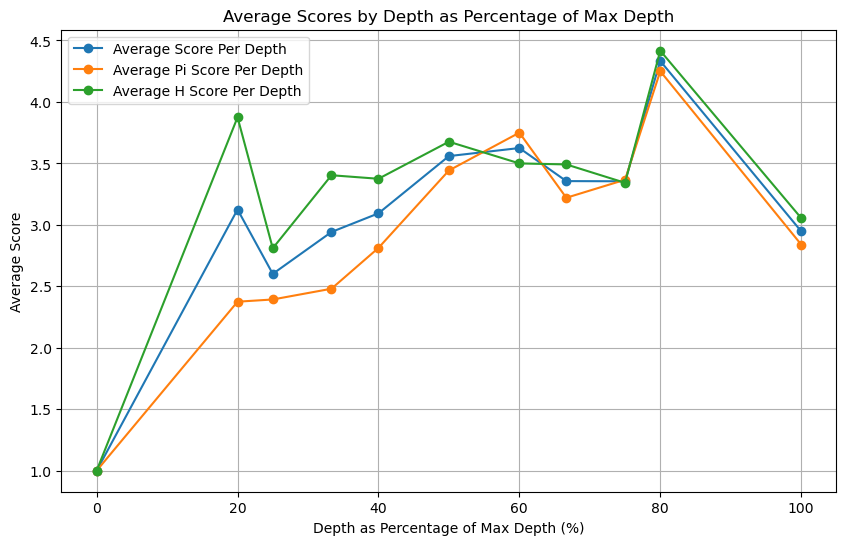

In [70]:
def plot_combined_average_scores_normalized(analysis, results):
    """
    Plots combined average scores per depth for all metrics with depth as a percentage of max depth.

    Args:
        analysis (dict): Dictionary containing DataFrames of average scores.
        results (List[dict]): Original list of result dictionaries (to get max depth).
    """
    # Create a mapping of result index to max depth
    max_depths = {i: result.get("tree_stats", {}).get("max_depth", 1) for i, result in enumerate(results)}

    def normalize_depth(df):
        """Adds a column for normalized depth as percentage."""
        df["Max Depth"] = df["Result"].map(max_depths)
        df["Depth Percentage"] = (df["Depth"] / df["Max Depth"]) * 100
        return df

    # Normalize depths for each metric
    normalized_analysis = {name: normalize_depth(df.copy()) for name, df in analysis.items()}

    # Plot all metrics on the same graph
    plt.figure(figsize=(10, 6))
    for name, df in normalized_analysis.items():
        # Group by normalized depth percentage and compute mean scores
        mean_scores = df.groupby("Depth Percentage")["Score"].mean()

        # Plot the mean scores
        plt.plot(
            mean_scores.index, 
            mean_scores.values, 
            marker="o", 
            linestyle="-", 
            label=name.replace("_", " ").title()
        )

    # Add titles, labels, and legend
    plt.title("Average Scores by Depth as Percentage of Max Depth")
    plt.xlabel("Depth as Percentage of Max Depth (%)")
    plt.ylabel("Average Score")
    plt.grid(True)
    plt.legend()
    plt.show()

# Example usage
# results = load_results_from_directory("path_to_results_directory")
analysis = analyze_average_scores(results)
plot_combined_average_scores_normalized(analysis, results)


In [71]:
def extract_scalar_distributions(results):
    """
    Extracts distributions of scalar values from the tree_stats of all results.

    Args:
        results (List[dict]): List of result dictionaries.

    Returns:
        dict: A dictionary containing lists of scalar values for each metric.
    """
    scalar_metrics = [
        "total_nodes",
        "max_pi_score",
        "max_h_score",
        "max_avg_score",
        "average_pi_score",
        "average_h_score",
        "average_avg_score",
        "max_depth"
    ]
    
    distributions = {metric: [] for metric in scalar_metrics}

    # Iterate through results to collect scalar values
    for result in results:
        tree_stats = result.get("tree_stats", {})
        for metric in scalar_metrics:
            if metric in tree_stats:
                distributions[metric].append(tree_stats[metric])

    return distributions

# Example usage
# results = load_results_from_directory("path_to_results_directory")
scalar_distributions = extract_scalar_distributions(results)

# Display distributions
for metric, values in scalar_distributions.items():
    print(f"{metric}: {values}")


total_nodes: [8, 16, 8, 28, 4, 1, 1, 3, 1, 7, 4, 3, 4, 5, 6, 4, 6, 5, 6, 1, 1, 11, 6, 5, 18, 2, 3, 10, 13, 6, 1, 5, 1, 6, 3, 4, 6, 4, 5, 7, 6, 7, 8, 2, 10, 7, 6, 3, 3, 1, 5, 4, 6, 4, 8, 1, 4, 46, 2, 6, 8, 12, 5, 3, 4, 6, 13, 20, 31, 1, 8, 4, 4, 5, 7, 5, 2, 2, 4, 3, 3, 6, 9, 1, 18, 3, 6, 23, 1, 5, 7, 5, 7, 6, 7, 4, 8, 3, 4, 9, 1, 1, 7, 3, 35, 12, 3, 4, 10, 4, 5, 6, 8, 8, 2, 4, 6, 1, 2, 5, 3, 6, 5, 15, 1, 10, 12, 7, 16, 1, 5, 15, 6, 6, 7, 3, 3, 1, 1, 1, 7, 33, 10, 2, 25, 10, 9, 7, 10, 9, 3, 1, 13, 1, 10, 5, 8, 4, 9, 3]
max_pi_score: [5, 5, 5, 5, 3, 1, 1, 5, 1, 5, 5, 1, 3, 5, 5, 4, 5, 1, 1, 1, 1, 5, 3, 5, 5, 5, 5, 5, 3, 1, 1, 5, 1, 5, 4, 2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 2, 5, 5, 4, 1, 2, 2, 5, 5, 4, 1, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 2, 3, 1, 5, 4, 5, 5, 4, 5, 1, 2, 4, 4, 5, 4, 5, 1, 5, 2, 5, 5, 1, 4, 2, 5, 5, 5, 5, 5, 3, 5, 3, 5, 1, 1, 5, 4, 5, 5, 5, 3, 5, 5, 3, 4, 5, 5, 1, 2, 3, 1, 5, 5, 2, 2, 5, 2, 1, 5, 3, 2, 5, 1, 5, 5, 5, 3, 5, 5, 4, 1, 1, 1, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 4, 1, 5, 1, 

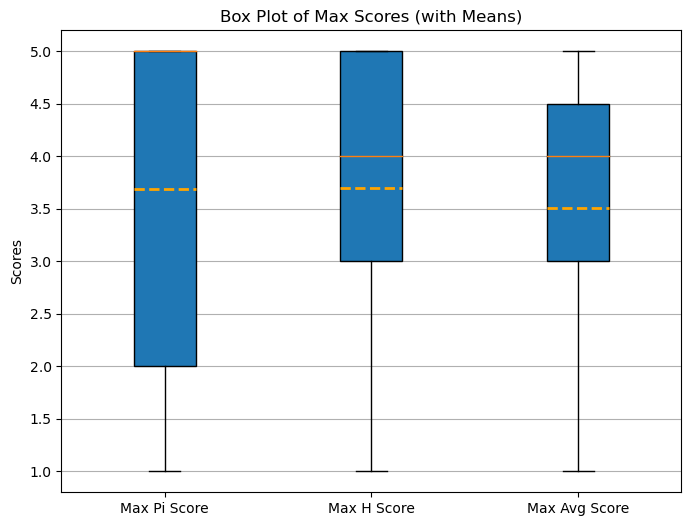

In [72]:
import matplotlib.pyplot as plt

def plot_max_scores_boxplot(scalar_distributions):
    """
    Plots a boxplot of max scores: max_pi_score, max_h_score, and max_avg_score with means shown.

    Args:
        scalar_distributions (dict): Dictionary of scalar values from extract_scalar_distributions.
    """
    # Extract the required data
    max_pi_scores = scalar_distributions["max_pi_score"]
    max_h_scores = scalar_distributions["max_h_score"]
    max_avg_scores = scalar_distributions["max_avg_score"]

    # Prepare data for the boxplot
    data = [max_pi_scores, max_h_scores, max_avg_scores]
    labels = ["Max Pi Score", "Max H Score", "Max Avg Score"]

    # Create the box plot
    plt.figure(figsize=(8, 6))
    plt.boxplot(
        data, 
        vert=True, 
        patch_artist=True, 
        labels=labels, 
        showmeans=True,
        meanline=True,
        meanprops={"color": "orange", "linewidth": 2, "linestyle": "--"}  # Customize mean appearance
    )
    plt.title("Box Plot of Max Scores (with Means)")
    plt.ylabel("Scores")
    plt.grid(True, axis="y")
    plt.show()

# Example usage
scalar_distributions = extract_scalar_distributions(results)
plot_max_scores_boxplot(scalar_distributions)


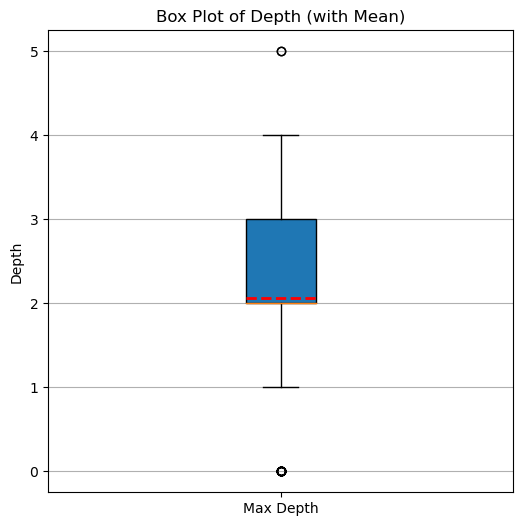

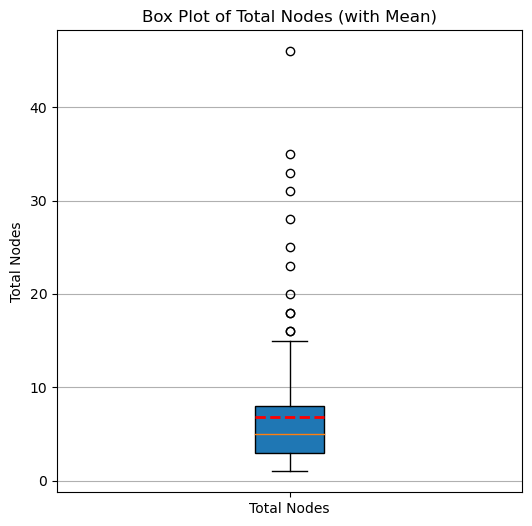

In [73]:
import matplotlib.pyplot as plt

def plot_scalar_boxplots(scalar_distributions):
    """
    Plots separate boxplots for max_depth and total_nodes.

    Args:
        scalar_distributions (dict): Dictionary of scalar values from extract_scalar_distributions.
    """
    # Extract the required data
    max_depth = scalar_distributions["max_depth"]
    total_nodes = scalar_distributions["total_nodes"]

    # Create box plot for max depth
    plt.figure(figsize=(6, 6))
    plt.boxplot(
        max_depth, 
        vert=True, 
        patch_artist=True, 
        labels=["Max Depth"], 
        showmeans=True,
        meanline=True,
        meanprops={"color": "red", "linewidth": 2, "linestyle": "--"}
    )
    plt.title("Box Plot of Depth (with Mean)")
    plt.ylabel("Depth")
    plt.grid(True, axis="y")
    plt.show()

    # Create box plot for total nodes
    plt.figure(figsize=(6, 6))
    plt.boxplot(
        total_nodes, 
        vert=True, 
        patch_artist=True, 
        labels=["Total Nodes"], 
        showmeans=True,
        meanline=True,
        meanprops={"color": "red", "linewidth": 2, "linestyle": "--"}
    )
    plt.title("Box Plot of Total Nodes (with Mean)")
    plt.ylabel("Total Nodes")
    plt.grid(True, axis="y")
    plt.show()

# Example usage
# results = load_results_from_directory("path_to_results_directory")
scalar_distributions = extract_scalar_distributions(results)
plot_scalar_boxplots(scalar_distributions)


In [74]:
print(f"max_avg_score: {np.mean(scalar_distributions['max_avg_score'])}")
print(f"max_pi_score: {np.mean(scalar_distributions['max_pi_score'])}")
print(f"max_h_score: {np.mean(scalar_distributions['max_h_score'])}")
print(f"llm calls: {np.mean(scalar_distributions['total_nodes'])*3 + 2}")

max_avg_score: 3.503125
max_pi_score: 3.6875
max_h_score: 3.69375
llm calls: 22.418750000000003


In [87]:
# load from a pickle file
import pickle
# from check_equivalence import check_equivalence_z3

with open('/homes/ecaplan/exp_simp/few_shot_results/few_shot_results.pkl', 'rb') as f:
    fs_results = pickle.load(f)

(pis, xs, final_xs, pi_scores, h_scores) = fs_results

In [83]:
# read from json
import json

with open('/homes/ecaplan/exp_simp/few_shot_results/few_shot_results.json', 'r') as f:
    fs_results = json.load(f)

pi_scores = [result['pi_score'] for result in fs_results]
h_scores = [result['h_score'] for result in fs_results]
avg_scores = [result['avg_score'] for result in fs_results]

KeyError: 'x'

In [82]:
print(f"avg_score: {np.mean(avg_scores)}")
print(f"pi_score: {np.mean(pi_scores)}")
print(f"h_score: {np.mean(h_scores)}")


avg_score: 2.275
pi_score: 1.025
h_score: 3.525


In [93]:
for x, final_x in zip(xs, final_xs):
    print(f"{x} -> {final_x}")

(x^2 + 2x)/x + (y^2 + 3y)/y -> (x^2+2x)/x+(y^2+3y)/y
(a^2 + 2a)/a + (b^2 + 3b)/b -> (a^2+2a)/a+(b^2+3b)/b
(2x^2 + 4x)/x + (y^2 + 5y)/y -> (2x^2+4x)/x+(y^2+5y)/y
(a^3 + 3a^2)/a + (b^2 + 2b)/b -> (a^3+3a^2)/a+(b^2+2b)/b
(2x^2 + 6x)/x + (y^3 + 4y^2)/y -> (2x^2+6x)/x+(y^3+4y^2)/y
x^{-3} + x^2 + x^{-1} + 4x + 3 -> x^{-3}+x^2+x^{-1}+4x+3
a^{-1} + a^2 + b^{-3} + 2b + 5 -> a^{-1}+a^2+b^{-3}+2b+5
x^{-2} + x + x^3 + 3x^4 + x^{-1} -> x^{-2}+x+x^3+3x^4+x^{-1}
x^{-1} + x + x^2 + 3x^3 + 7 -> x^{-1}+x+x^2+3x^3+7
a^{-2} + b^{-1} + a^3 + b^2 + 2 -> a^{-2}+b^{-1}+a^3+b^2+2
((1/x)/(1/y))^2 + ((1/a)/(1/b))^3 -> ((1/x)/(1/y))^2+((1/a)/(1/b))^3
((1/x^2)/(1/y^3))^2 + ((1/a^2)/(1/b^3))^3 -> ((1/x^2)/(1/y^3))^2+((1/a^2)/(1/b^3))^3
((1/x)/(1/y))^3 + ((1/a)/(1/b))^4 -> ((1/x)/(1/y))^3+((1/a)/(1/b))^4
((1/x^3)/(1/y^4))^3 + ((1/a^3)/(1/b^4))^4 -> ((1/x^3)/(1/y^4))^3+((1/a^3)/(1/b^4))^4
((1/x)/(1/y^2))^3 + ((1/a)/(1/b^2))^2 -> ((1/x)/(1/y^2))^3+((1/a)/(1/b^2))^2
2x + 3x + 4x - 5y + y + z + z^2 -> 2x+3x+4x-5y+y+z+z^